In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
# LRG catalog
cat_s = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.0.0/resolve/dr9_lrg_south_1.0.0_basic.fits'))
cat_n = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.0.0/resolve/dr9_lrg_north_1.0.0_basic.fits'))
cat = vstack([cat_s, cat_n])

# Pixel-based NOBS values for the LRGs
nobs_s = Table(fitsio.read('/global/cscratch1/sd/rongpu/temp/dr9_lrg_south_1.0.0_nobs.fits'))
nobs_n = Table(fitsio.read('/global/cscratch1/sd/rongpu/temp/dr9_lrg_north_1.0.0_nobs.fits'))
nobs = vstack([nobs_s, nobs_n])

# LRG veto mask
lrgmask_s = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.0.0/resolve/dr9_lrg_south_1.0.0_lrgmask_v1.fits'))
lrgmask_n = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/targets/dr9.0/1.0.0/resolve/dr9_lrg_north_1.0.0_lrgmask_v1.fits'))
lrgmask = vstack([lrgmask_s, lrgmask_n])

In [4]:
mask = cat['NOBS_G']<nobs['NOBS_G']
print(np.sum(mask), np.sum(mask)/len(mask))
mask = cat['NOBS_G']>nobs['NOBS_G']
print(np.sum(mask), np.sum(mask)/len(mask))

mask = cat['NOBS_R']<nobs['NOBS_R']
print(np.sum(mask), np.sum(mask)/len(mask))
mask = cat['NOBS_R']>nobs['NOBS_R']
print(np.sum(mask), np.sum(mask)/len(mask))

mask = cat['NOBS_Z']<nobs['NOBS_Z']
print(np.sum(mask), np.sum(mask)/len(mask))
mask = cat['NOBS_Z']>nobs['NOBS_Z']
print(np.sum(mask), np.sum(mask)/len(mask))

4 3.2417564160437765e-07
456334 0.036983091808973016
2 1.6208782080218882e-07
424110 0.034371532840208156
3 2.4313173120328326e-07
564070 0.04571443853994533


__Pixel-based NOBS are (almost) always more restrictive than tractor__

In [5]:
print('NOBS_GRZ>=1 (required for LRG targets)')
mask0 = (cat['NOBS_G']>=1) & (cat['NOBS_R']>=1) & (cat['NOBS_Z']>=1)
mask1 = (nobs['NOBS_G']>=1) & (nobs['NOBS_R']>=1) & (nobs['NOBS_Z']>=1)

print(np.sum(mask0)==len(cat))  # sanity check
print('Fraction that disagree: {:.3f}%'.format(100*(np.sum(mask1!=mask0)/np.sum(mask0))))
# print('Pixel-based NOBS are always more restrictive than tractor:', np.all((mask1!=mask0)==(mask1<mask0)))

NOBS_GRZ>=1 (required for LRG targets)
True
Fraction that disagree: 0.205%


In [6]:
print('NOBS_GRZ>=2')
mask0 = (cat['NOBS_G']>=2) & (cat['NOBS_R']>=2) & (cat['NOBS_Z']>=2)
mask1 = (nobs['NOBS_G']>=2) & (nobs['NOBS_R']>=2) & (nobs['NOBS_Z']>=2)

print('Fraction in tractor catalog:  {:.3f}%'.format(100*np.sum(mask0)/len(mask0)))
print('Fraction in Pixel-based NOBS: {:.3f}%'.format(100*np.sum(mask1)/len(mask1)))
print('Fraction that disagree:       {:.3f}%'.format(100*(np.sum(mask1!=mask0)/np.sum(mask0))))
# print('Pixel-based NOBS are always more restrictive than tractor:', np.all((mask1!=mask0)==(mask1<mask0)))

NOBS_GRZ>=2
Fraction in tractor catalog:  95.525%
Fraction in Pixel-based NOBS: 94.721%
Fraction that disagree:       0.841%


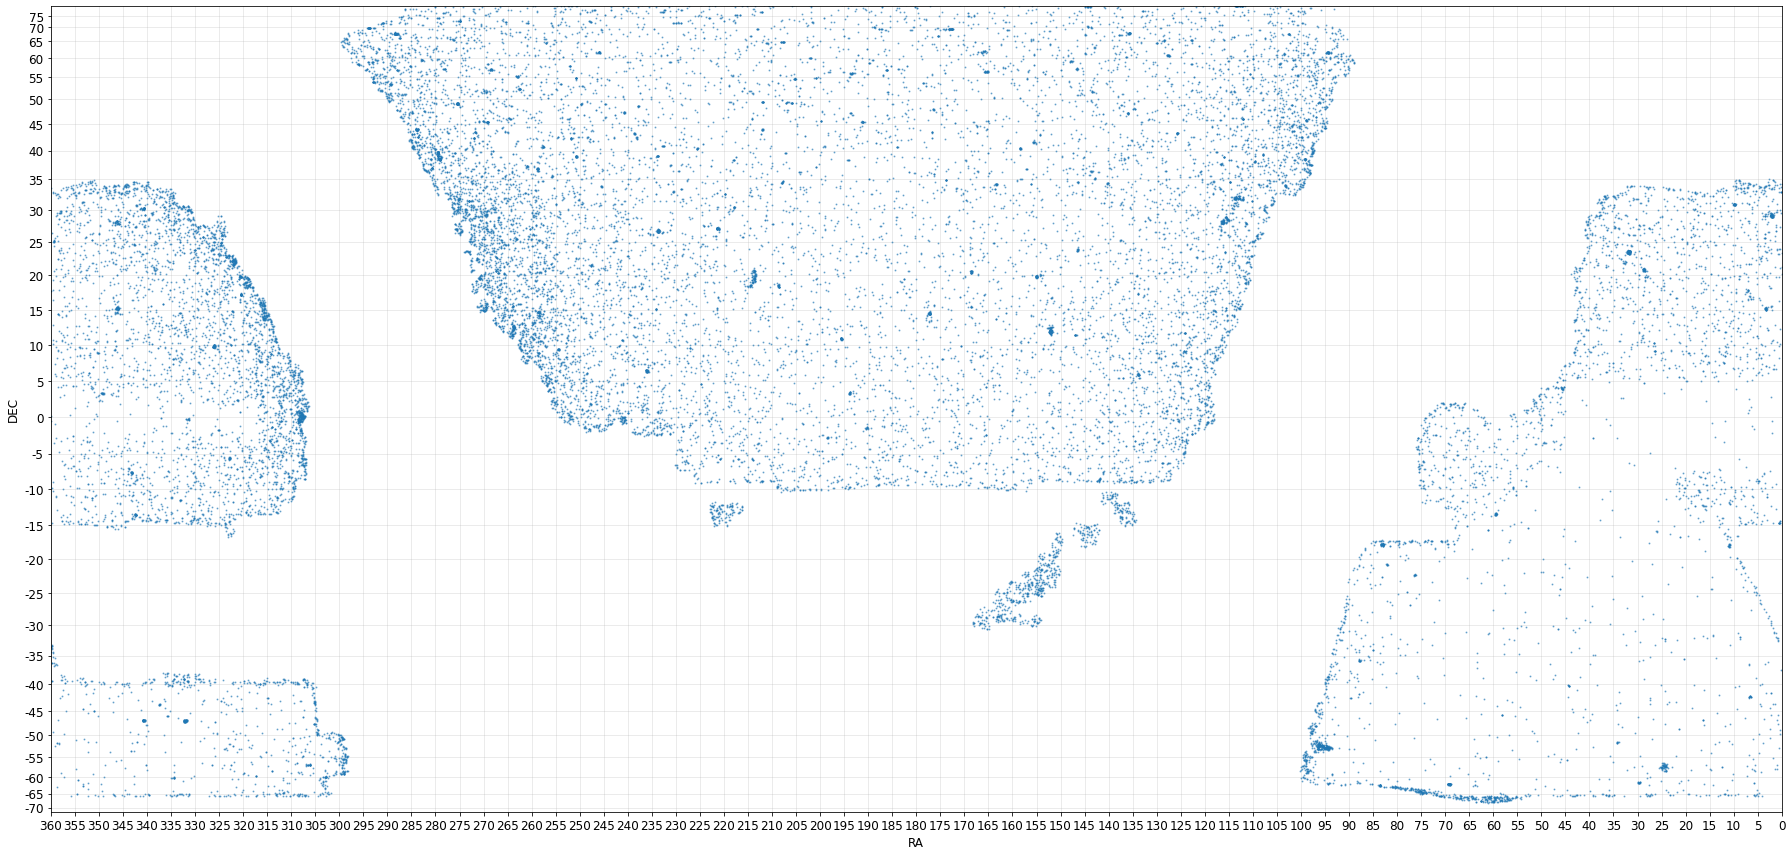

In [7]:
mask0 = (cat['NOBS_G']>=1) & (cat['NOBS_R']>=1) & (cat['NOBS_Z']>=1)
mask1 = (nobs['NOBS_G']>=1) & (nobs['NOBS_R']>=1) & (nobs['NOBS_Z']>=1)
mask = mask0!=mask1

# mask = np.full(len(cat), True)
fig, ax = plt.subplots(figsize=(25, 12))
ax.plot(cat['RA'][mask], np.sin(np.radians(cat['DEC'][mask])), '.', ms=2, alpha=0.5)
ax.axis([360, 0, -0.95, 0.99])
ax.set_yticks(np.sin(np.radians(np.arange(-70, 80, 5))))
ax.set_yticklabels(np.arange(-70, 80, 5))
ax.set_xticks(np.arange(0, 365, 5))
ax.grid(alpha=0.3)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.tight_layout()
plt.show()

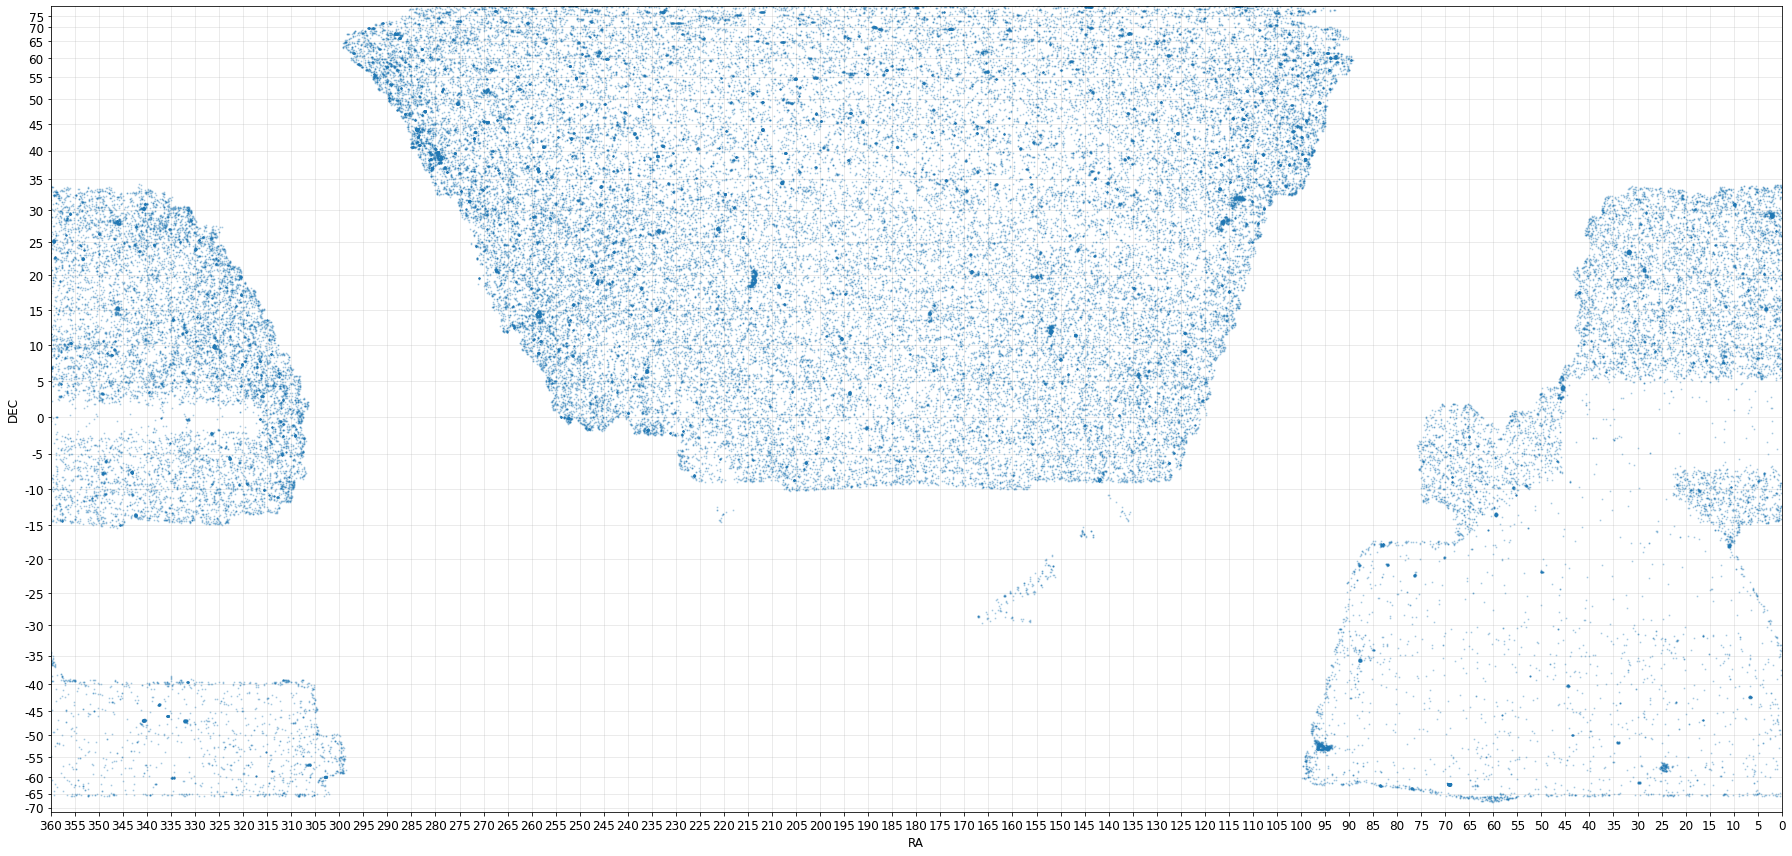

In [8]:
mask0 = (cat['NOBS_G']>=2) & (cat['NOBS_R']>=2) & (cat['NOBS_Z']>=2)
mask1 = (nobs['NOBS_G']>=2) & (nobs['NOBS_R']>=2) & (nobs['NOBS_Z']>=2)
mask = mask0!=mask1

# mask = np.full(len(cat), True)
fig, ax = plt.subplots(figsize=(25, 12))
ax.plot(cat['RA'][mask], np.sin(np.radians(cat['DEC'][mask])), '.', ms=2, alpha=0.25)
ax.axis([360, 0, -0.95, 0.99])
ax.set_yticks(np.sin(np.radians(np.arange(-70, 80, 5))))
ax.set_yticklabels(np.arange(-70, 80, 5))
ax.set_xticks(np.arange(0, 365, 5))
ax.grid(alpha=0.3)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.tight_layout()
plt.show()

In [9]:
# Apply LRG mask
mask = lrgmask['lrg_mask']==0
cat = cat[mask]
nobs = nobs[mask]

In [10]:
print('NOBS_GRZ>=1 (required for LRG targets)')
mask0 = (cat['NOBS_G']>=1) & (cat['NOBS_R']>=1) & (cat['NOBS_Z']>=1)
mask1 = (nobs['NOBS_G']>=1) & (nobs['NOBS_R']>=1) & (nobs['NOBS_Z']>=1)

print(np.sum(mask0)==len(cat))  # sanity check
print('Fraction that disagree: {:.3f}%'.format(100*(np.sum(mask1!=mask0)/np.sum(mask0))))
# print('Pixel-based NOBS are always more restrictive than tractor:', np.all((mask1!=mask0)==(mask1<mask0)))

NOBS_GRZ>=1 (required for LRG targets)
True
Fraction that disagree: 0.116%


In [11]:
print('NOBS_GRZ>=2')
mask0 = (cat['NOBS_G']>=2) & (cat['NOBS_R']>=2) & (cat['NOBS_Z']>=2)
mask1 = (nobs['NOBS_G']>=2) & (nobs['NOBS_R']>=2) & (nobs['NOBS_Z']>=2)

print('Fraction in tractor catalog:  {:.3f}%'.format(100*np.sum(mask0)/len(mask0)))
print('Fraction in Pixel-based NOBS: {:.3f}%'.format(100*np.sum(mask1)/len(mask1)))
print('Fraction that disagree:       {:.3f}%'.format(100*(np.sum(mask1!=mask0)/np.sum(mask0))))
# print('Pixel-based NOBS are always more restrictive than tractor:', np.all((mask1!=mask0)==(mask1<mask0)))

NOBS_GRZ>=2
Fraction in tractor catalog:  95.815%
Fraction in Pixel-based NOBS: 95.333%
Fraction that disagree:       0.502%


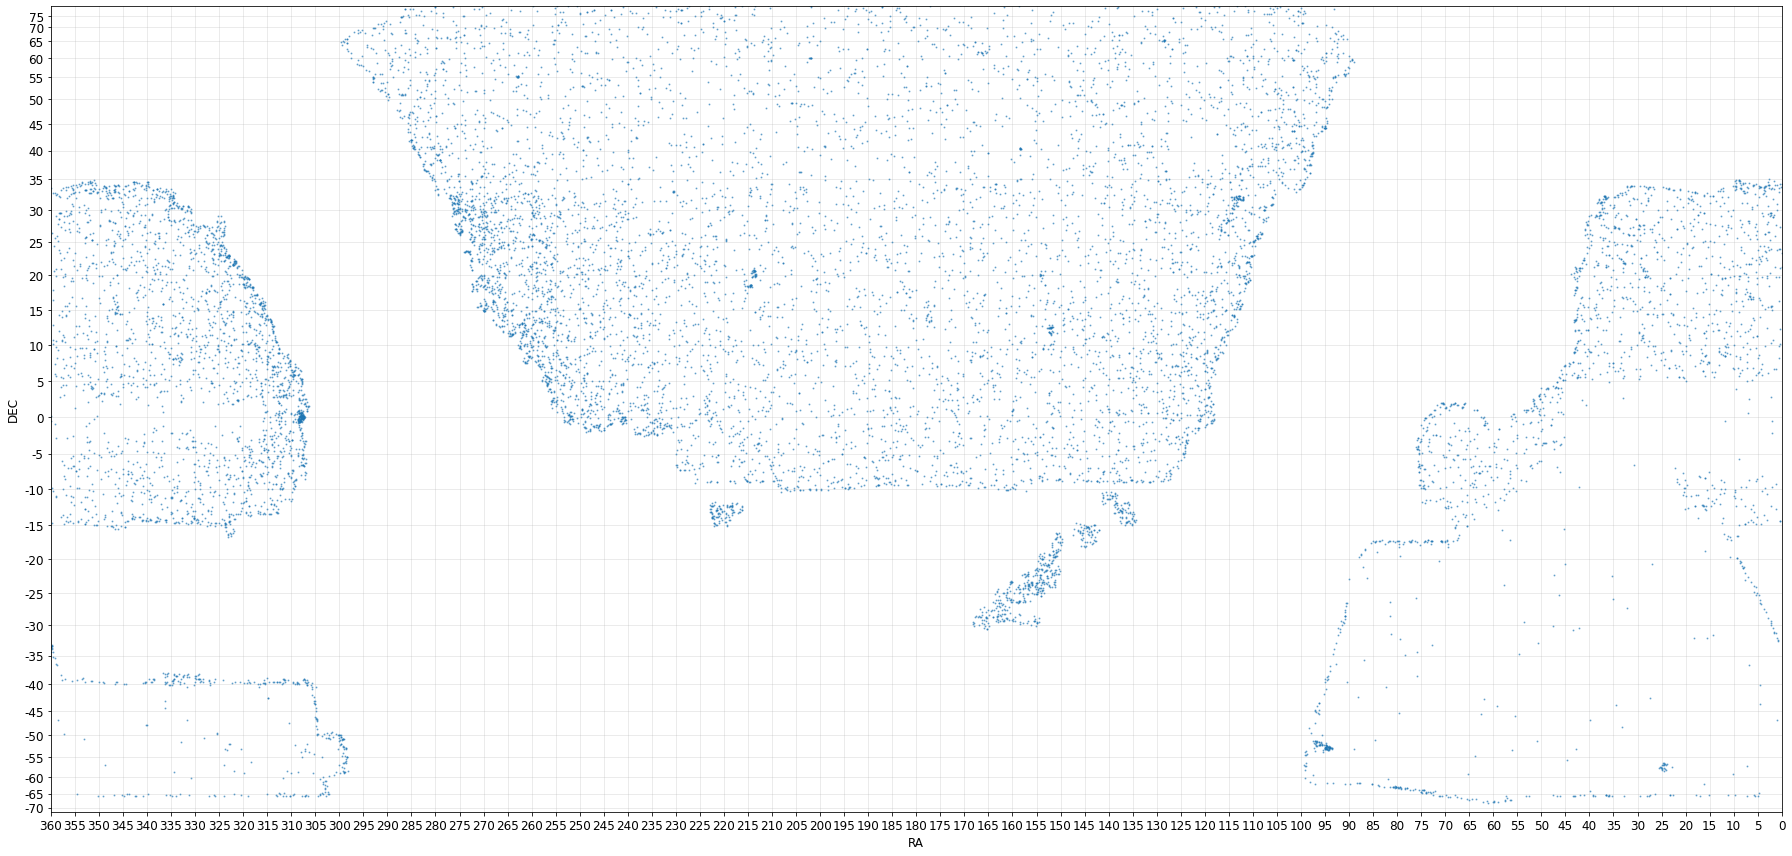

In [12]:
mask0 = (cat['NOBS_G']>=1) & (cat['NOBS_R']>=1) & (cat['NOBS_Z']>=1)
mask1 = (nobs['NOBS_G']>=1) & (nobs['NOBS_R']>=1) & (nobs['NOBS_Z']>=1)
mask = mask0!=mask1

# mask = np.full(len(cat), True)
fig, ax = plt.subplots(figsize=(25, 12))
ax.plot(cat['RA'][mask], np.sin(np.radians(cat['DEC'][mask])), '.', ms=2, alpha=0.5)
ax.axis([360, 0, -0.95, 0.99])
ax.set_yticks(np.sin(np.radians(np.arange(-70, 80, 5))))
ax.set_yticklabels(np.arange(-70, 80, 5))
ax.set_xticks(np.arange(0, 365, 5))
ax.grid(alpha=0.3)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.tight_layout()
plt.show()

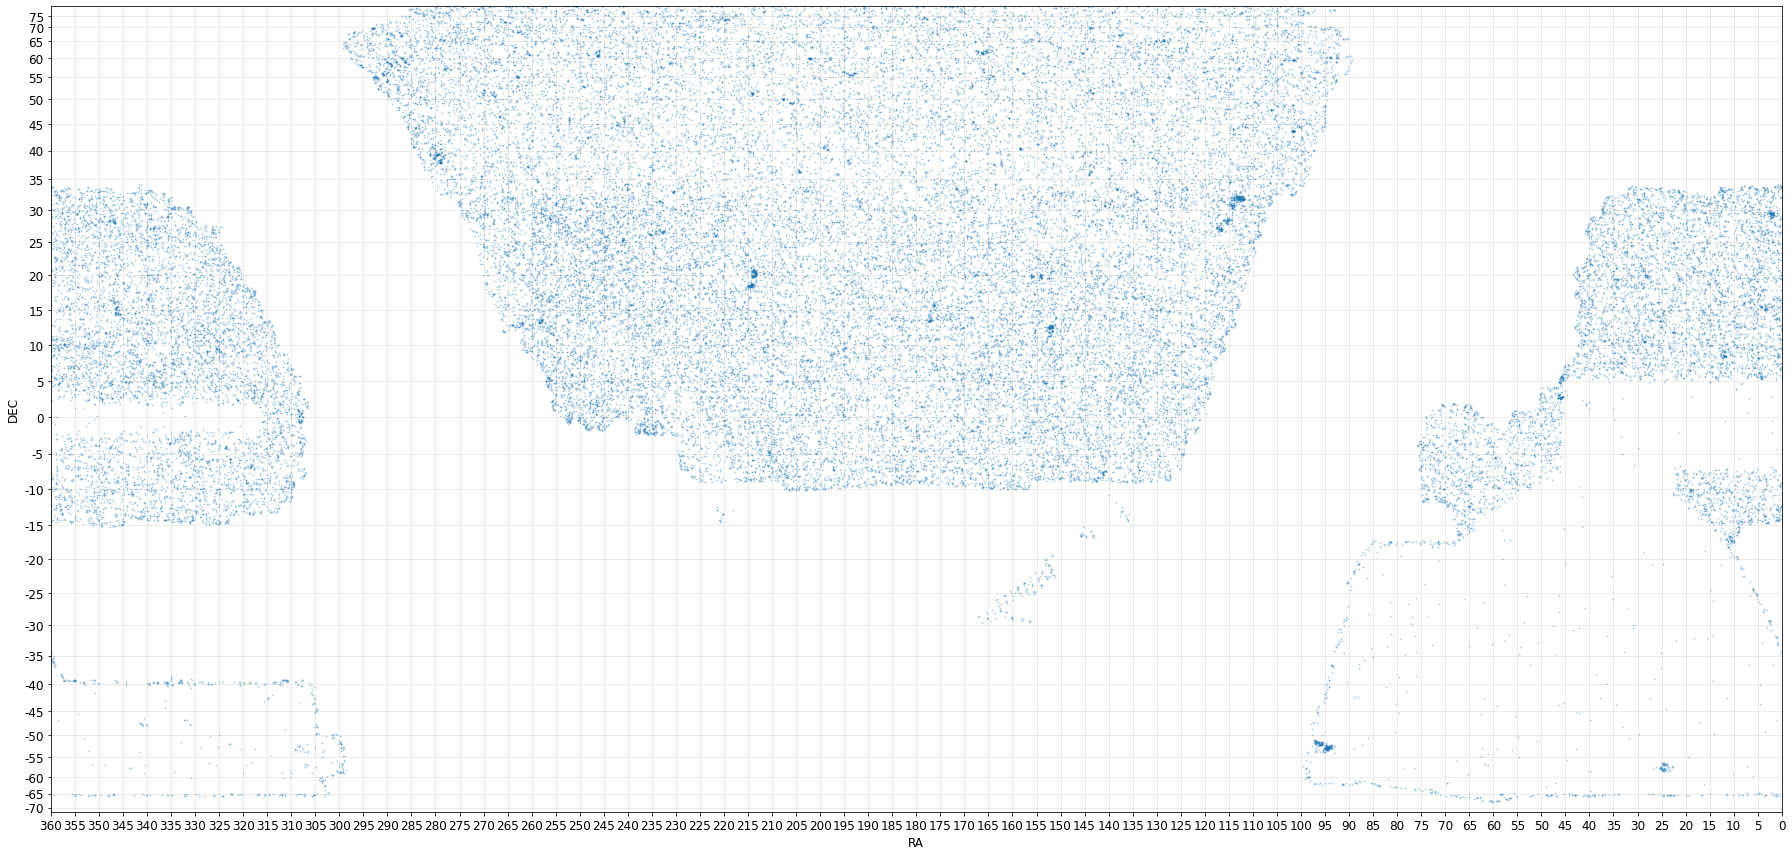

In [13]:
mask0 = (cat['NOBS_G']>=2) & (cat['NOBS_R']>=2) & (cat['NOBS_Z']>=2)
mask1 = (nobs['NOBS_G']>=2) & (nobs['NOBS_R']>=2) & (nobs['NOBS_Z']>=2)
mask = mask0!=mask1

# mask = np.full(len(cat), True)
fig, ax = plt.subplots(figsize=(25, 12))
ax.plot(cat['RA'][mask], np.sin(np.radians(cat['DEC'][mask])), '.', ms=2, alpha=0.25)
ax.axis([360, 0, -0.95, 0.99])
ax.set_yticks(np.sin(np.radians(np.arange(-70, 80, 5))))
ax.set_yticklabels(np.arange(-70, 80, 5))
ax.set_xticks(np.arange(0, 365, 5))
ax.grid(alpha=0.3)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
plt.tight_layout()
plt.show()